#  1. 데이터프레임 생성 및 확인

## CSV 파일 읽기 및 기본 확인

In [ ]:
import pandas as pd

df = pd.read_csv('auto-mpg.csv')   #파일을 불러올때 .read_csv 사용

print(df.head())                    #위에서부터 ()개의 행을 출력 - 공백이면 5개가 기본

print(df.tail())                    #아래에서 ()개의 행을 출력


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin         car name  
393          82       1  ford mustang gl  
394          82       2        vw pickup  
395          82       1    dodge rampage  
396          82       1      ford ranger  
397          82       1       chevy s-10  


## 데이터 기본 정보 확인

In [ ]:
print(df.info())    #데이터 타입, 결측치 확인 

print(df.shape)     #데이터 형태(행, 열) 확인

print(df.dtypes)    #데이터 열(column)의 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
(398, 9)
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


# 2. 데이터 요약과 탐색

## 수치형 데이터 요약 통계 확인

In [ ]:
print(df.describe())    #.describe() = 데이터프레임의 전반적인 통계적 요약

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


## 범주형 데이터 고유값 확인

In [33]:
# 'origin' 컬럼의 고유값 빈도
print(df['origin'].value_counts())  #복습 .value_counts = 밸류값의 갯수

# 빈도의 비율로 보기 (%)
print(df['origin'].value_counts(normalize=True) * 100)
#df['origin'] - 데이터프레임에서 'origin'이라는 이름의 컬럼(시리즈) 하나만 선택
#.value_counts - 밸류값의 갯수
#normalize=True - 전체에서 차지하는 비율(0~1 사이의 값)로 변환 (0~1 사이기때문에 0.2 0.5 이런식으로 나오니까 *100을 해주는것임)

origin
1    249
3     79
2     70
Name: count, dtype: int64
origin
1    62.562814
3    19.849246
2    17.587940
Name: proportion, dtype: float64


## 결측치 탐색

In [ ]:
print(df.isnull().sum())   #복습 .isnull() = 결측값을 확인하는것
                           #복습 .sum() = 앞에서 확인한 각각의 값을 더해서 보여주는것

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


# 3. 통계 분석 함수 활용

## 평균(mean), 중앙값(median), 표준편차(std)

In [ ]:
# 'mpg'의 평균 계산
print(df['mpg'].mean())

# 'mpg'의 중앙값 계산
print(df['mpg'].median())

# 'mpg'의 표준편차 계산
print(df['mpg'].std())      #표준편차 - 각 값이 평균과 얼마나 차이가 나는지 구한 값

23.514572864321607
23.0
7.815984312565782


## 최댓값(max), 최솟값(min)과 상관계수(corr)

In [ ]:
# 최댓값과 최솟값 계산
print(df['horsepower'].max(), df['horsepower'].min())
#df안에 'horsepower'의 최댓값, df안에 'horsepower'의 최소값

# 두 열 간의 상관계수 계산
print(df[['mpg', 'weight']].corr())
#.corr() = 두 변수 간의 관계를 -1에서 1 사이의 값으로 나타낸다.
# 음수 = 하나가 증가하면 다른 하나가 감소함 / # 양수 = 하나가 증가하면 다른 하나도 증가함

? 100
             mpg    weight
mpg     1.000000 -0.831741
weight -0.831741  1.000000


# 4. 그룹별 분석 (GroupBy)

##  origin 별 평균 연비(mpg) 계산

In [ ]:
# origin 기준으로 mpg의 평균 계산
print(df.groupby('origin')['mpg'].mean())   #복습 groupby('origin')['mpg'] = 같은 origin 묶어서 mpg값을 계산한다.

origin
1    20.083534
2    27.891429
3    30.450633
Name: mpg, dtype: float64


##  숫자가 아닌 값 결측치로 대체

In [ ]:
# 'horsepower'이라는 컬럼에 숫자만 있는게 아니라 ?,one,공백 과 같이 문자가 섞여있을 때 사용
temp_numeric = pd.to_numeric(df['horsepower'], errors='coerce') 
#.to_numeric(df['horsepower'] = 'horsepower'의 데이터를 숫자로 바꿔줘 라는 함수
# errors='coerce' = 숫자로 바꿀 수 있는것은 숫자로 바꿔주고, 숫자로 바꿀 수 없는것은 NaN으로 강제로 바꿔줌


df['horsepower'] = temp_numeric
#위에서 계산한 값을 df의 'horsepower'에 넣어줘

# NaN이 된 행(즉, 숫자가 아니었던 행)만 필터링하여 확인합니다.
non_numeric_rows = df[temp_numeric.isna()]  
#.isna() = 위에서 errors='coerce'로 인해 문자에서 NaN으로 바뀐 행을 찾아서 True or False로 표시
#"숫자로 바꾸려다 실패해서 NaN이 되어버린 문제의 그 행들만 따로 모아서 보여줘!"라는 의미

print(non_numeric_rows) 
# 결과 예시: '?'가 포함된 행들만 출력됩니다.

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model year  origin              car name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl  


## 그룹별 여러 통계값 계산

In [ ]:
# origin별로 mpg, horsepower, weight의 평균
grouped_df = df.groupby('origin')[['mpg', 'horsepower', 'weight']].mean()
#복습 groupby('origin')['mpg', 'horsepower', 'weight'] = 같은 origin 묶어서 'mpg','horsepower', 'weight'값을 계산한다.

print(grouped_df)


              mpg  horsepower       weight
origin                                    
1       20.083534  119.048980  3361.931727
2       27.891429   80.558824  2423.300000
3       30.450633   79.835443  2221.227848


# 5. 판다스로 시각화하기

##  히스토그램(Histogram)

<Axes: title={'center': 'MPG Histogram'}, ylabel='Frequency'>

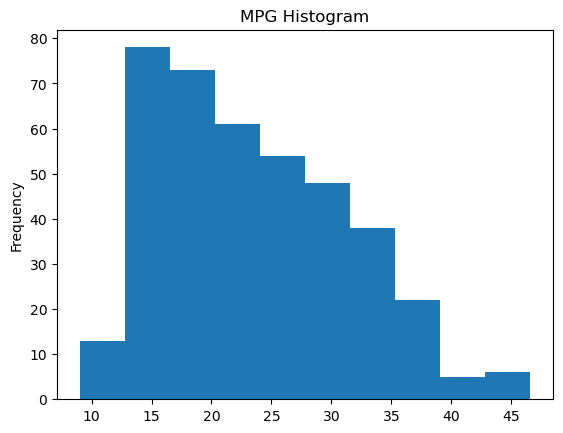

In [20]:
# mpg(연비) 데이터의 분포
df['mpg'].plot(kind='hist', title='MPG Histogram')

## 선 그래프(Line Plot)

<Axes: title={'center': 'MPG over Years'}, xlabel='model year'>

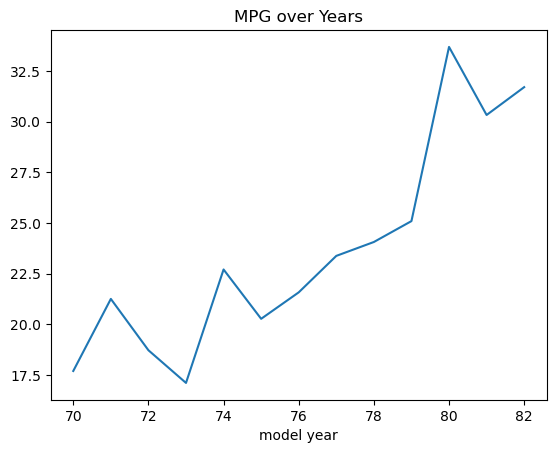

In [21]:
# 연도별 평균 mpg 변화
df.groupby('model year')['mpg'].mean().plot(kind='line', title='MPG over Years')

## 산점도(Scatter Plot)

<Axes: title={'center': 'Weight vs MPG Scatter'}, xlabel='weight', ylabel='mpg'>

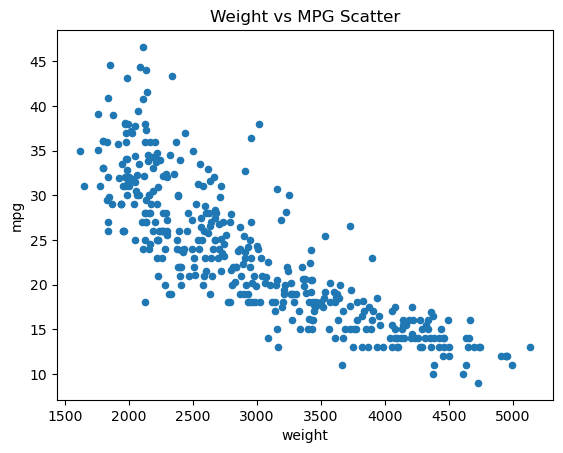

In [22]:
# 무게와 연비의 관계
df.plot.scatter(x='weight', y='mpg', title='Weight vs MPG Scatter')

## 박스플롯(Box Plot)

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

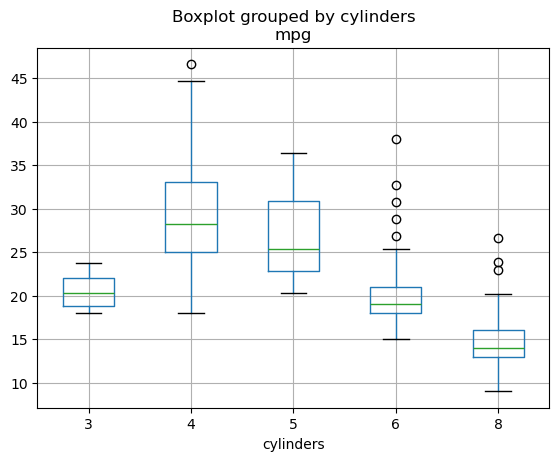

In [23]:
# 실린더 개수별 mpg의 분포
df.boxplot(column='mpg', by='cylinders', grid=True)

#  고급 시각화 활용 (Seaborn)

## 상관관계 히트맵(Heatmap)

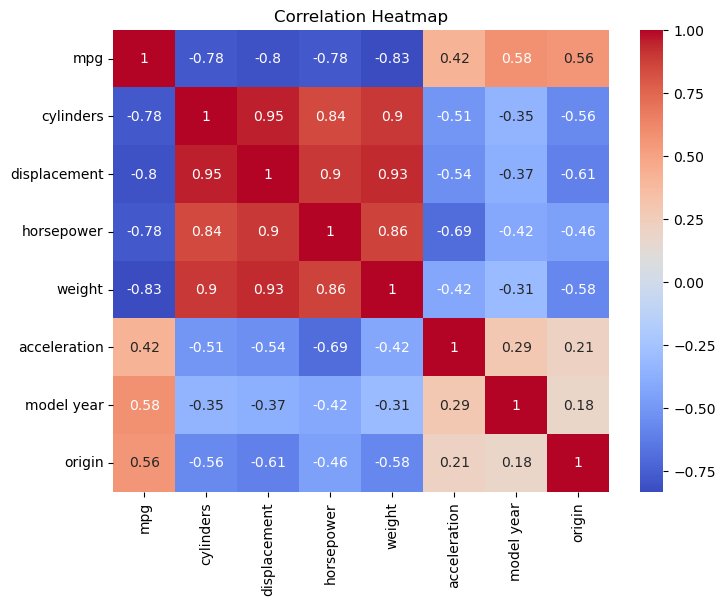

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 커널 밀도 추정(KDE Plot)

C:\Users\lee\AppData\Local\Temp\ipykernel_36532\2781921370.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['mpg'], shade=True)


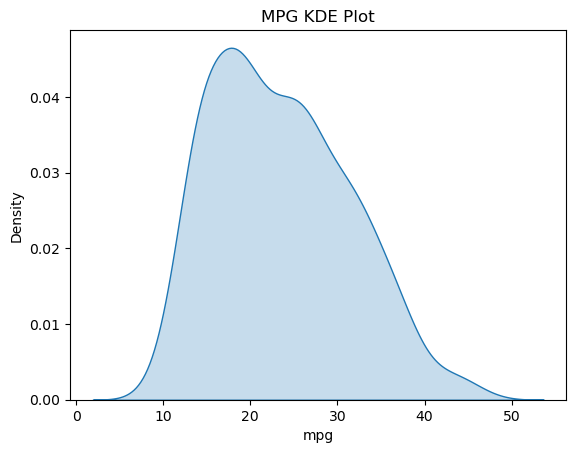

In [37]:
# mpg 밀도 그래프
sns.kdeplot(df['mpg'], shade=True)
plt.title('MPG KDE Plot')
plt.show()

## 페어 플롯(Pairplot)

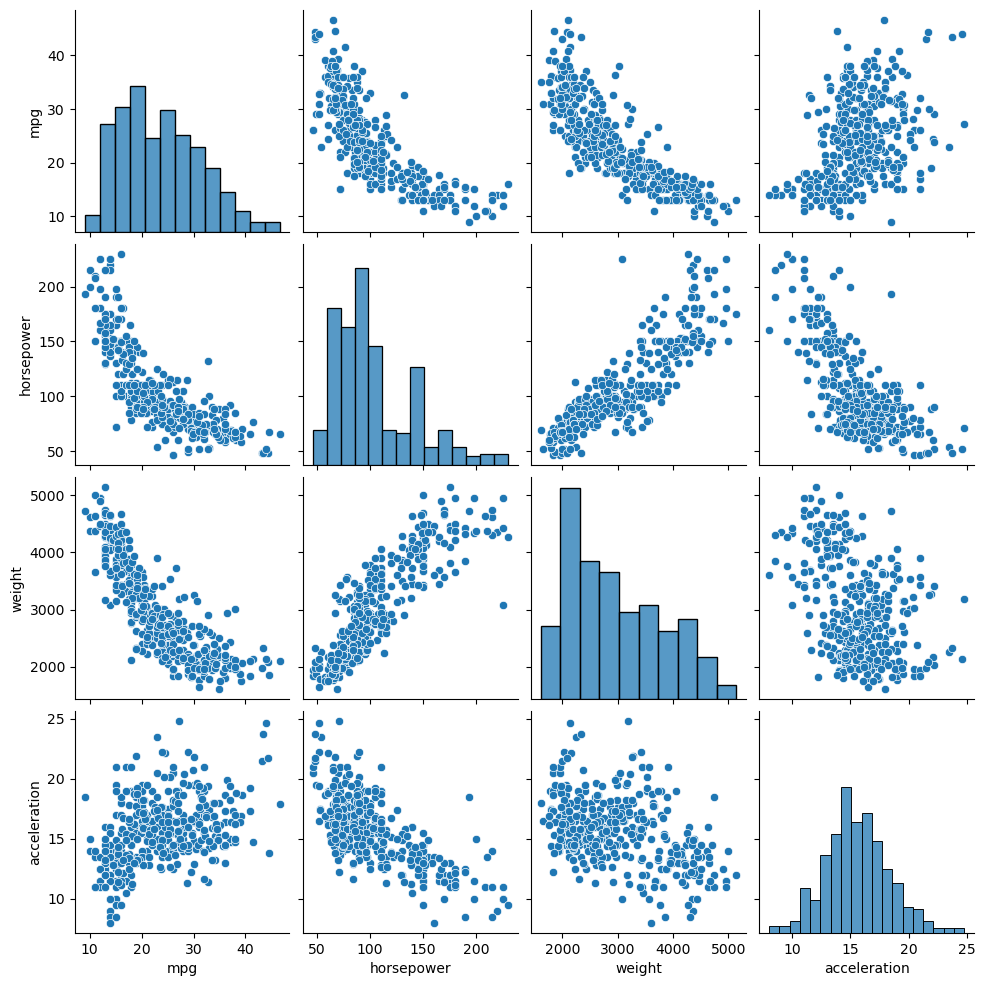

In [36]:
# 여러 컬럼 간 관계 한눈에 파악
sns.pairplot(df[['mpg', 'horsepower', 'weight', 'acceleration']])
plt.show()

#  7. 지리 데이터 시각화 (Folium)

In [38]:
# folium 설치
!pip install folium


   ---------------------------------------- 2/2 [folium]



## 기본 지도 생성 및 마커 추가

In [44]:
import folium

# 기본 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 마커 추가
folium.Marker([37.5665, 126.9780], popup='Seoul').add_to(m)

# 지도 저장 및 출력
m.save('map.html')
m